<a href="https://github.com/linogaliana/python-datascientist/blob/master/course/NLP/01_intro.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/course/NLP/01_intro.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/course/NLP/01_intro.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABcourse/NLP%20
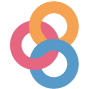

In [1]:
#| echo: false
#| output: 'asis'
#| include: true
#| eval: true

import sys
sys.path.insert(1, '../../../../') #insert the utils module
from utils import print_badges

#print_badges(__file__)
print_badges("content/course/NLP/01_intro.qmd")

{{% box status="warning" title="Warning" icon="fa fa-exclamation-triangle" %}}
Le NLP est un domaine immense de recherche. Cette page est une introduction
fort incomplète à la question. Il s'agit de montrer la logique, quelques exemples
avec `Python` <i class="fab fa-python"></i>
et s'amuser avec comme base d'exemple un livre formidable :books: :
*Le Comte de Monte Cristo*
{{% /box %}}

## Base d'exemple

La base d'exemple est le *Comte de Monte Cristo* d'Alexandre Dumas.
Il est disponible
gratuitement sur le site
[Project Gutemberg](http://www.gutenberg.org/ebooks/author/492) comme des milliers
d'autres livres du domaine public. La manière la plus simple de le récupérer
est de télécharger avec le module `urllib` le fichier texte et le retravailler
légèrement pour ne conserver que le corpus du livre : 


In [2]:
from urllib import request

url = "https://www.gutenberg.org/files/17989/17989-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

dumas = raw.split("*** START OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***")[1].split("*** END OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***")[0]

import re

def clean_text(text):
    text = text.lower() # mettre les mots en minuscule
    text = " ".join(text.split())
    return text

dumas = clean_text(dumas)

dumas[10000:10500]

" mes yeux. --vous avez donc vu l'empereur aussi? --il est entré chez le maréchal pendant que j'y étais. --et vous lui avez parlé? --c'est-à-dire que c'est lui qui m'a parlé, monsieur, dit dantès en souriant. --et que vous a-t-il dit? --il m'a fait des questions sur le bâtiment, sur l'époque de son départ pour marseille, sur la route qu'il avait suivie et sur la cargaison qu'il portait. je crois que s'il eût été vide, et que j'en eusse été le maître, son intention eût été de l'acheter; mais je lu"

## La particularité des données textuelles

### Objectif

Le *natural language processing* (NLP) ou
*traitement automatisé de la langue* (TAL) en Français, vise à extraire de l'information de textes à partir d'une analyse statistique du contenu. 
Cette définition permet d'inclure de nombreux champs d'applications au sein
du NLP (traduction, analyse de sentiment, recommandation, surveillance, etc. ) ainsi que de méthodes. 

Cette approche implique de transformer un texte, qui est une information compréhensible par un humain, en un nombre, information appropriée pour un ordinateur et une approche statistique ou algorithmique. 

Transformer une information textuelle en valeurs numériques propres à une analyse statistique n'est pas une tâche évidente. Les données textuelles sont **non structurées** puisque l'information cherchée, qui est propre à chaque analyse, est perdue au milieu d'une grande masse d'informations qui doit, de plus, être interprétée dans un certain contexte (un même mot ou une phrase n'ayant pas la même signification selon le contexte). 

Si cette tâche n'était pas assez difficile comme ça, on peut ajouter d'autres difficultés propres à l'analyse textuelle car ces données sont :

* bruitées : ortographe, fautes de frappe...
* changeantes : la langue évolue avec de nouveaux mots, sens...
* complexes : structures variables, accords...
* ambigues : synonymie, polysémie, sens caché...
* propres à chaque langue : il n'existe pas de règle de passage unique entre deux langues
* grande dimension : des combinaisons infinies de séquences de mots

### Méthode

L’unité textuelle peut être le mot ou encore une séquence de *n*
mots (un *n-gramme*) ou encore une chaîne de caractères (e.g. la
ponctuation peut être signifiante). On parle de **token**. L’analyse textuelle vise à transformer le texte en données
numériques manipulables. 

On peut ensuite utiliser diverses techniques (clustering,
classification supervisée) suivant l’objectif poursuivi pour exploiter
l’information transformée. Mais les étapes de nettoyage de texte sont indispensables car sinon un algorithme sera incapable de détecter une information pertinente dans l'infini des possibles. 




## Nettoyer un texte

Les *wordclouds* sont des représentations graphiques assez pratiques pour visualiser
les mots les plus fréquents. Elles sont très simples à implémenter en `Python`
avec le module `wordcloud` qui permet même d'ajuster la forme du nuage à
une image :


(-0.5, 1429.5, 783.5, -0.5)

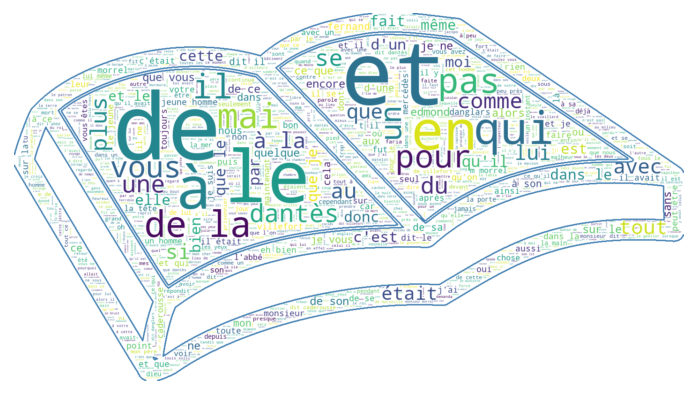

In [3]:
#| include: false
#| echo: true
import wordcloud
import numpy as np
import io
import requests
import PIL
import matplotlib.pyplot as plt

img = "https://raw.githubusercontent.com/linogaliana/python-datascientist/master/content/course/NLP/book.png"
book_mask = np.array(PIL.Image.open(io.BytesIO(requests.get(img).content)))

fig = plt.figure()

def make_wordcloud(corpus):
    wc = wordcloud.WordCloud(background_color="white", max_words=2000, mask=book_mask, contour_width=3, contour_color='steelblue')
    wc.generate(corpus)
    return wc

plt.imshow(make_wordcloud(dumas), interpolation='bilinear')
plt.axis("off")
#plt.show()
#plt.savefig('word.png', bbox_inches='tight')

Cela montre clairement qu'il est nécessaire de nettoyer notre texte. Le nom
du personnage principal, Dantès, est ainsi masqué par un certain nombre
d'articles ou mots de liaison qui perturbent l'analyse. Ces mots sont des 
*stop-words*. La librairie `NLTK` (*Natural Language ToolKit*), librairie
de référence dans le domaine du NLP, permet de facilement retirer ces
stopwords (cela pourrait également être fait avec 
la librairie plus récente, `spaCy`). Avant cela, il est nécessaire
de transformer notre texte en le découpant par unités fondamentales (les tokens)

### Tokenisation

La tokenisation consiste à découper un texte en morceaux. Ces morceaux
pourraient être des phrases, des chapitres, des n-grammes ou des mots. C'est
cette dernière option que l'on va choisir, plus simple pour retirer les 
*stopwords* :


In [4]:
import nltk
nltk.download('punkt')

words = nltk.word_tokenize(dumas, language='french')
words[1030:1050]

[nltk_data] Downloading package punkt to /github/home/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['que',
 'voulez-vous',
 ',',
 'monsieur',
 'edmond',
 ',',
 'reprit',
 "l'armateur",
 'qui',
 'paraissait',
 'se',
 'consoler',
 'de',
 'plus',
 'en',
 'plus',
 ',',
 'nous',
 'sommes',
 'tous']

On remarque que les mots avec apostrophes sont liés en un seul, ce qui est
peut-être faux sur le plan de la grammaire mais peu avoir un sens pour une 
analyse statistique. Il reste des signes de ponctuation qu'on peut éliminer
avec la méthode `isalpha`: 


In [5]:
words = [word for word in words if word.isalpha()]
words[1030:1050]

['assez',
 'sombre',
 'obséquieux',
 'envers',
 'ses',
 'supérieurs',
 'insolent',
 'envers',
 'ses',
 'subordonnés',
 'aussi',
 'outre',
 'son',
 'titre',
 'comptable',
 'qui',
 'est',
 'toujours',
 'un',
 'motif']

{{% box status="hint" title="Hint" icon="fa fa-lightbulb" %}}
Lors de la première utilisation de `NLTK`, il est nécessaire de télécharger
quelques éléments nécessaires à la tokenisation, notamment la ponctuation.
Pour cela, 

~~~python
import nltk
nltk.download('punkt')
~~~
{{% /box %}}


### Retirer les stopwords

Le jeu de données est maintenant propre. On peut désormais retirer les 
*stop words*. 

{{% box status="hint" title="Hint" icon="fa fa-lightbulb" %}}
Lors de la première utilisation de `NLTK`, il est nécessaire de télécharger
les stopwords. 


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /github/home/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

{{% /box %}}


In [7]:
from nltk.corpus import stopwords
print(stopwords.words("french"))

stop_words = set(stopwords.words('french'))


words = [w for w in words if not w in stop_words]
print(words[1030:1050])

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

Ces retraitements commencent à porter leurs fruits puisque des mots ayant plus
de sens commencent à se dégager, notamment les noms des personnages
(Fernand, Mercédès, Villefort, etc.)


<!-- KA : ne s'affichait pas sur le site sans que je comprenne pourquoi. J'ai ajouté echo=TRUE... -->


(-0.5, 1429.5, 783.5, -0.5)

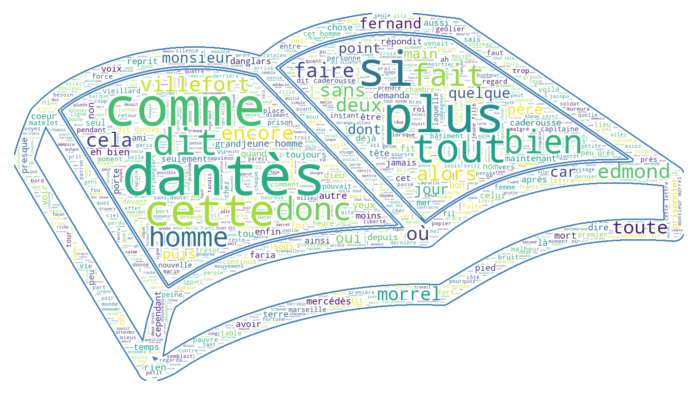

In [8]:
#| include: false
#| echo: true
wc = make_wordcloud(' '.join(words))

fig = plt.figure()

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### *Stemming*

Pour réduire la complexité d'un texte, on peut tirer partie de
"classes d'équivalence" : on peut
considérer que différentes formes d’un même mot (pluriel,
singulier, conjugaison) sont équivalentes et les remplacer par une
même forme dite canonique. Il existe deux approches dans le domaine :

* la **lemmatisation** qui requiert la connaissance des statuts
grammaticaux (exemple : chevaux devient cheval)
* la **racinisation** (*stemming*) plus fruste mais plus rapide, notamment
en présence de fautes d’orthographes. Dans ce cas, chevaux peut devenir chev
mais être ainsi confondu avec chevet ou cheveux

La racinisation est plus simple à mettre en oeuvre car elle peut s'appuyer sur
des règles simples pour extraire la racine d'un mot. 


Pour réduire un mot dans sa forme "racine", c'est-à-dire en s'abstrayant des
conjugaisons ou variations comme les pluriels, on applique une méthode de
*stemming*. Le but du *stemming* est de regrouper de
nombreuses variantes d’un mot comme un seul et même mot.
Par exemple, une fois que l’on applique un stemming, "chats" et "chat" 
deviennent un même mot. 
Cette approche a l'avantage de réduire la taille du vocabulaire à maîtriser
pour l'ordinateur et le modélisateur. Il existe plusieurs algorithmes de 
*stemming*, notamment le *Porter Stemming Algorithm* ou le
*Snowball Stemming Algorithm*. Nous pouvons utiliser ce dernier en Français :


In [9]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')

stemmed = [stemmer.stem(word) for word in words]
print(stemmed[1030:1050])

['celui', 'dantes', 'a', 'dépos', 'pass', 'comment', 'paquet', 'dépos', 'danglar', 'roug', 'pass', 'dev', 'port', 'capitain', 'entrouvert', 'vu', 'remettr', 'paquet', 'cet', 'lettr']


A ce niveau, les mots commencent à être moins intelligibles par un humain. 
La machine prendra le relais, on lui a préparé le travail

{{% box status="note" title="Note" icon="fa fa-comment" %}}
Il existe aussi le stemmer suivant : 

~~~python
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()
~~~
{{% /box %}}


### Reconnaissance des entités nommées

Cette étape n'est pas une étape de préparation mais illustre la capacité 
des librairies `Python` a extraire du sens d'un texte. La librairie 
`spaCy` permet de faire de la reconnaissance d'entités nommées, ce qui peut
être pratique pour extraire rapidement certains personnages de notre oeuvre

~~~python
#!pip install deplacy
#!python -m spacy download fr_core_news_sm
import pkg_resources,imp
imp.reload(pkg_resources)
import spacy

nlp=spacy.load("fr_core_news_sm")
doc = nlp(dumas)
displacy.render(doc, style="ent", jupyter=True)
~~~


## Représentation d'un texte sous forme vectorielle

Une fois nettoyé, le texte est plus propice à une représentation vectorielle.
En fait, implicitement, on a depuis le début adopté une démarche *bag of words*.
Il s'agit d'une représentation, sans souci de contexte (ordre, utilisation),
où chaque *token* représente un élément dans un vocabulaire de taille $|V|$.
On peut ainsi avoir une représentation matricielle les occurrences de
chaque *token* dans plusieurs documents (par exemple plusieurs livres,
chapitres, etc.) pour, par exemple, en déduire une forme de similarité. 


Afin de réduire la dimension de la matrice *bag of words*,
on peut s'appuyer sur des pondérations.
On élimine ainsi certains mots très fréquents ou au contraire très rares.
La pondération la plus simple est basée sur la fréquence des mots dans le document.
C'est l'objet de la métrique **tf-idf** (term frequency - inverse document frequency)
abordée dans un prochain chapitre.